## Credit Card Data Clustering  Kaggle 

#### https://www.kaggle.com/vipulgandhi/kmeans-detailed-explanation/notebook?select=CC+GENERAL.csv

In [22]:
#packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing as pp
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
data = pd.read_csv('GENERAL.csv')
# View missing values (count)
data.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [3]:
# Overview
data.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

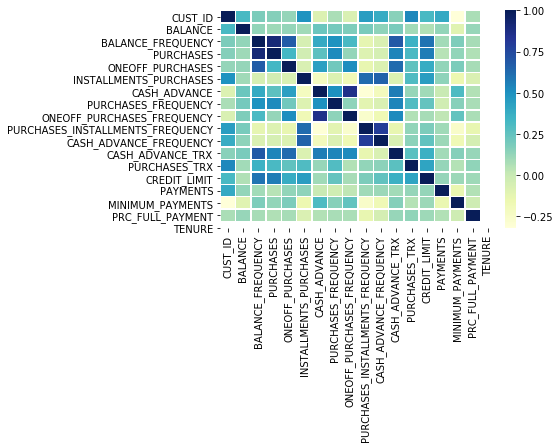

In [9]:
# Correlation plot
sns.heatmap(data.corr(),
            xticklabels=data.columns,
            yticklabels=data.columns,
            linewidths=.5,
            cmap="YlGnBu"
           )

C:\Users\anc7\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\anc7\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


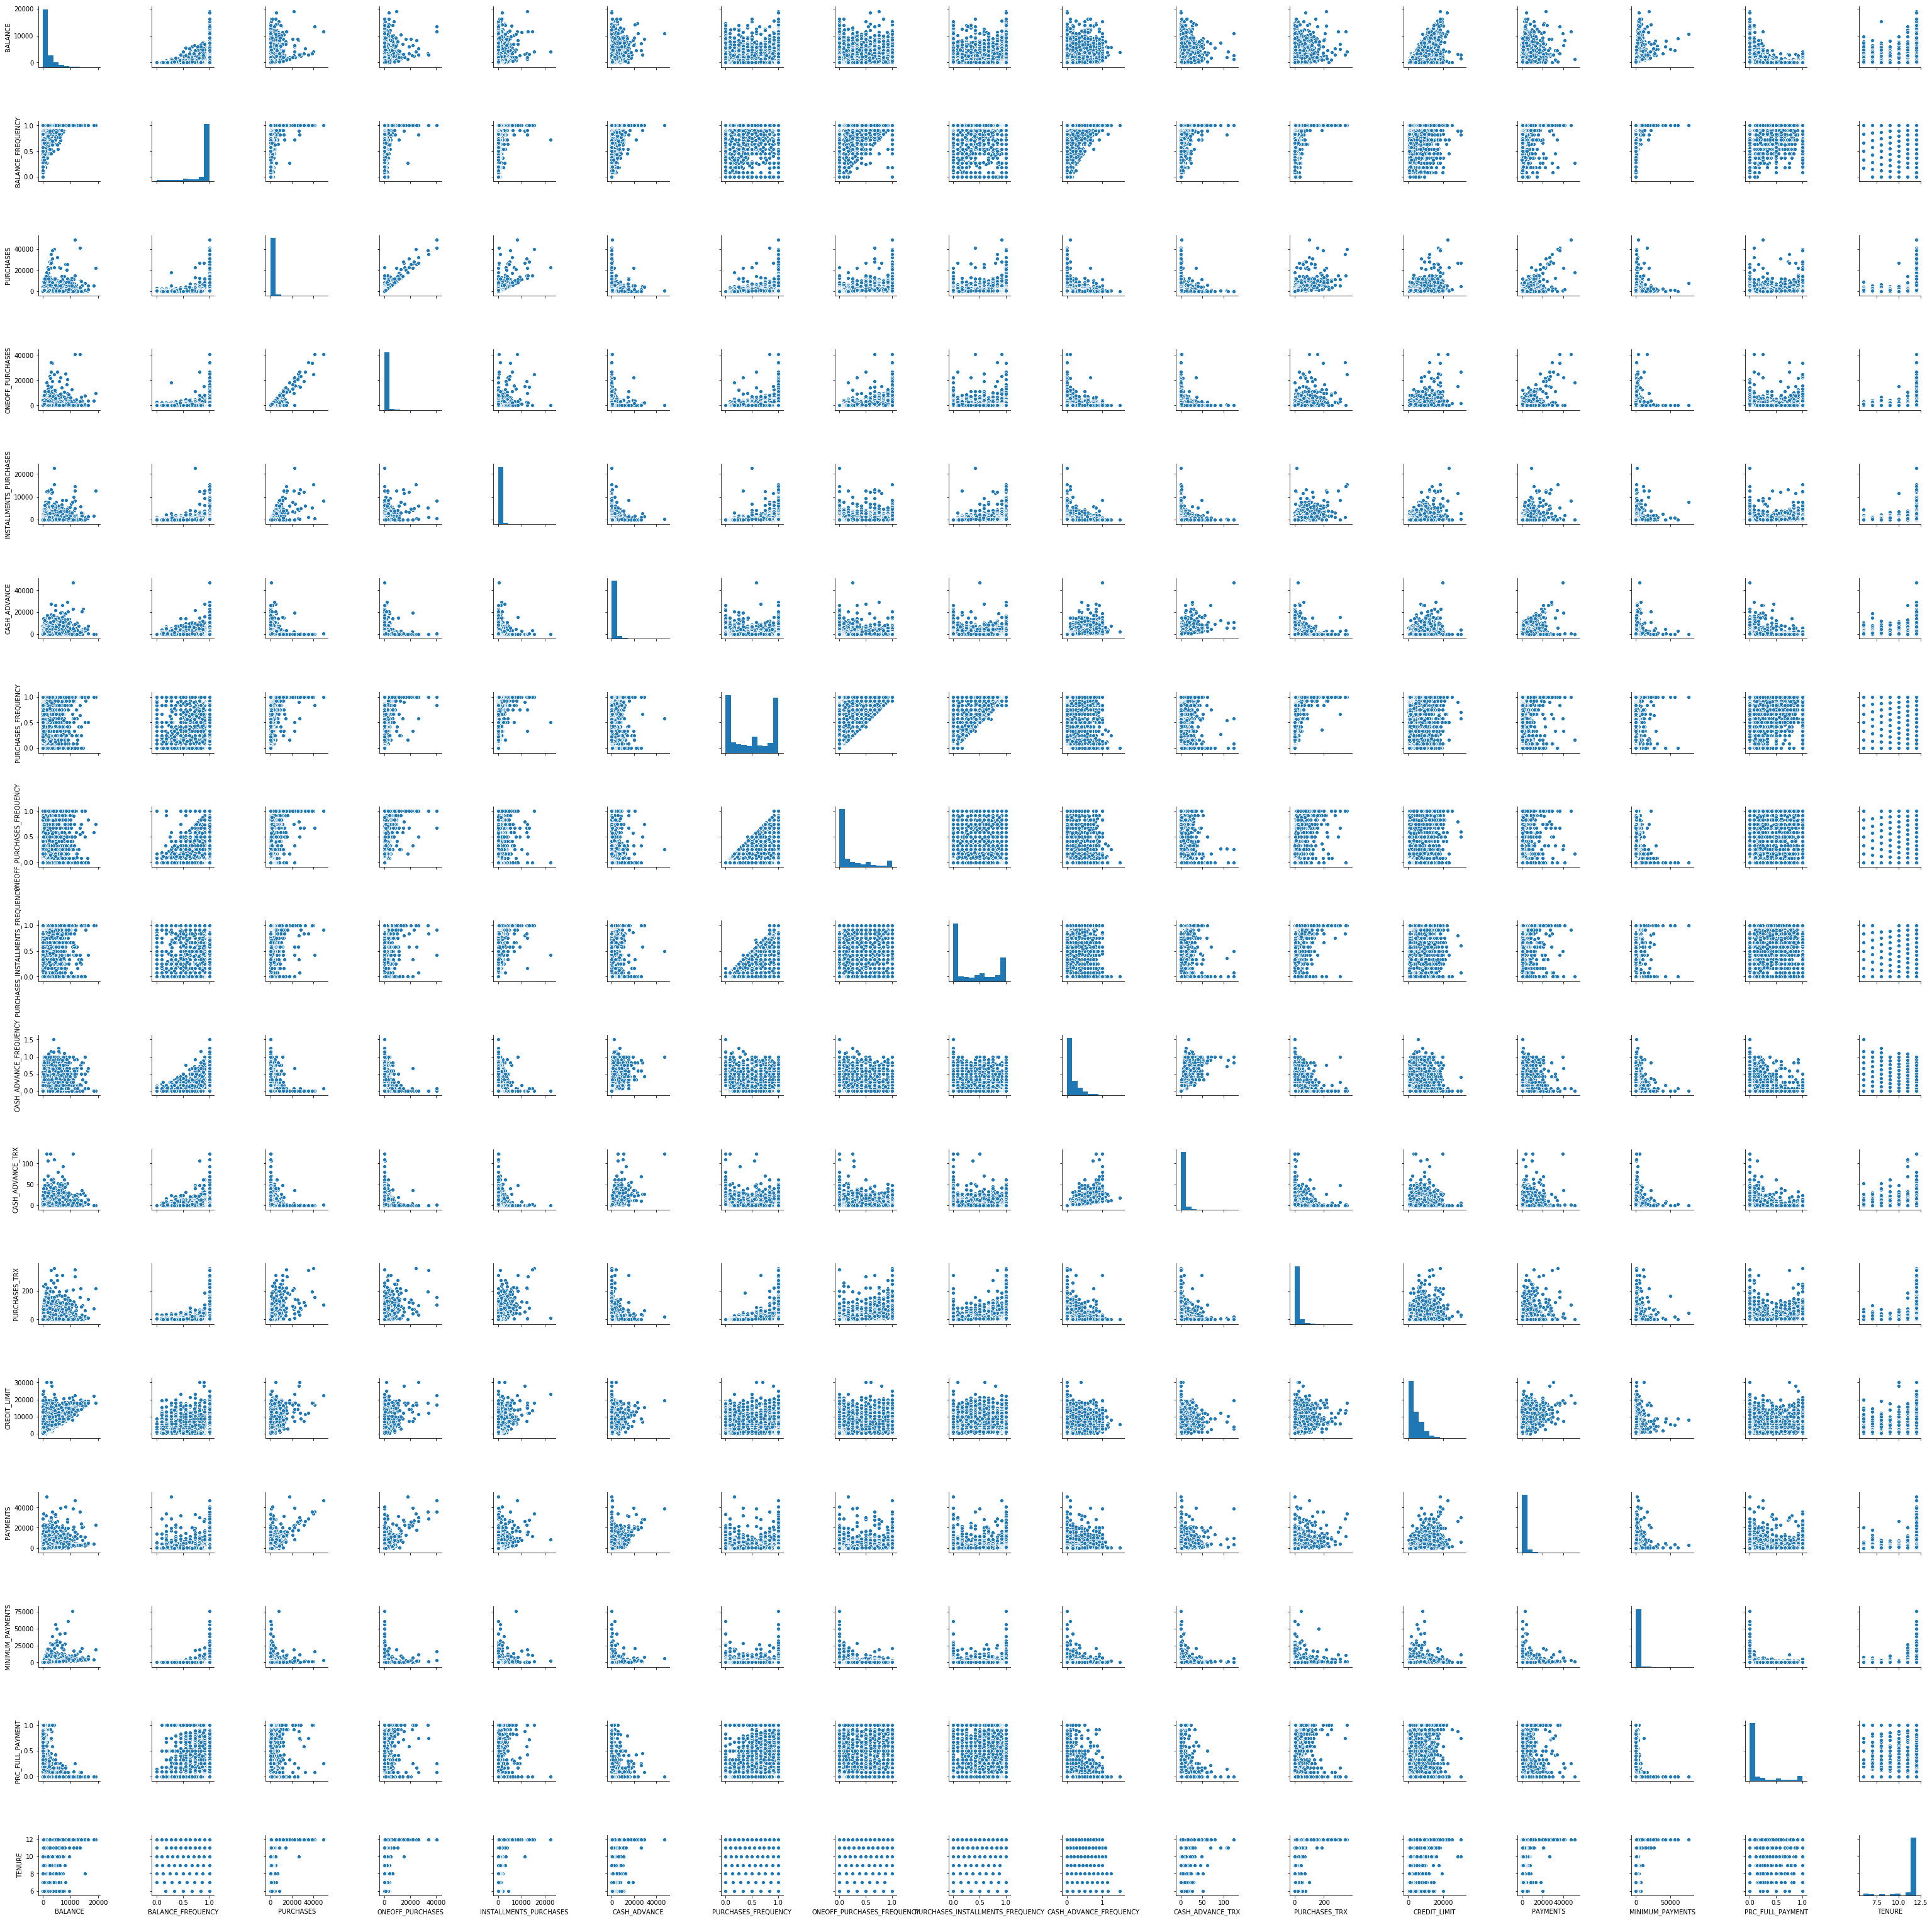

In [10]:
# Pairplot - dispersion between variables
sns.pairplot(data)

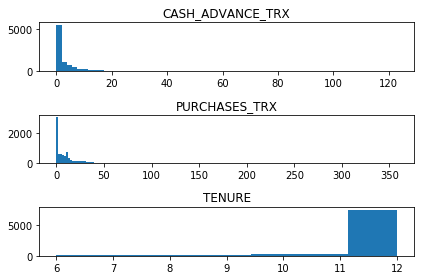

In [14]:
# Distribution of int64 variables
fig, axes = plt.subplots(nrows=3, ncols=1)
ax0, ax1, ax2 = axes.flatten()

ax0.hist(data['CASH_ADVANCE_TRX'], 65, histtype='bar', stacked=True)
ax0.set_title('CASH_ADVANCE_TRX')

ax1.hist(data['PURCHASES_TRX'], 173, histtype='bar', stacked=True)
ax1.set_title('PURCHASES_TRX')

ax2.hist(data['TENURE'], 7, histtype='bar', stacked=True)
ax2.set_title('TENURE')

fig.tight_layout()
plt.show()

### Features generation (copy data)

In [31]:
features = data.copy()
list(features)

['CUST_ID',
 'BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

In [32]:
# Log-transformation

cols =  ['BALANCE',
         'PURCHASES',
         'ONEOFF_PURCHASES',
         'INSTALLMENTS_PURCHASES',
         'CASH_ADVANCE',
         'CASH_ADVANCE_TRX',
         'PURCHASES_TRX',
         'CREDIT_LIMIT',
         'PAYMENTS',
         'MINIMUM_PAYMENTS',
        ]

# Note: Adding 1 for each value to avoid inf values
features[cols] = np.log(1 + features[cols])

features.describe()

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
count  8950.000000        8950.000000  8950.000000       8950.000000   
mean      6.161637           0.877271     4.899647          3.204274   
std       2.013303           0.236904     2.916872          3.246365   
min       0.000000           0.000000     0.000000          0.000000   
25%       4.861995           0.888889     3.704627          0.000000   
50%       6.773521           1.000000     5.892417          3.663562   
75%       7.628099           1.000000     7.013133          6.360274   
max       9.854515           1.000000    10.800403         10.615512   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean                 3.352403      3.319086             0.490351   
std                  3.082973      3.566298             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                  4.499810      0.000000             0.500000   
75%                  6.151961      7.016449             0.916667   
max                 10.021315     10.760839             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          0.817570       1.894731      8.094835   
std                  0.200121          1.009316       1.373856      0.819674   
min                  0.000000          0.000000       0.000000      3.931826   
25%                  0.000000          0.000000       0.693147      7.378384   
50%                  0.000000          0.000000       2.079442      8.006701   
75%                  0.222222          1.609438       2.890372      8.779711   
max                  1.500000          4.820282       5.883322     10.308986   

          PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count  8950.000000       8637.000000       8950.000000  8950.000000  
mean      6.624540          5.922195          0.153715    11.517318  
std       1.591763          1.190493          0.292499     1.338331  
min       0.000000          0.018982          0.000000     6.000000  
25%       5.951361          5.136526          0.000000    12.000000  
50%       6.754489          5.747301          0.000000    12.000000  
75%       7.550732          6.717182          0.142857    12.000000  
max      10.834125         11.243832          1.000000    12.000000

In [33]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_principal)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

NameError: name 'X_principal' is not defined

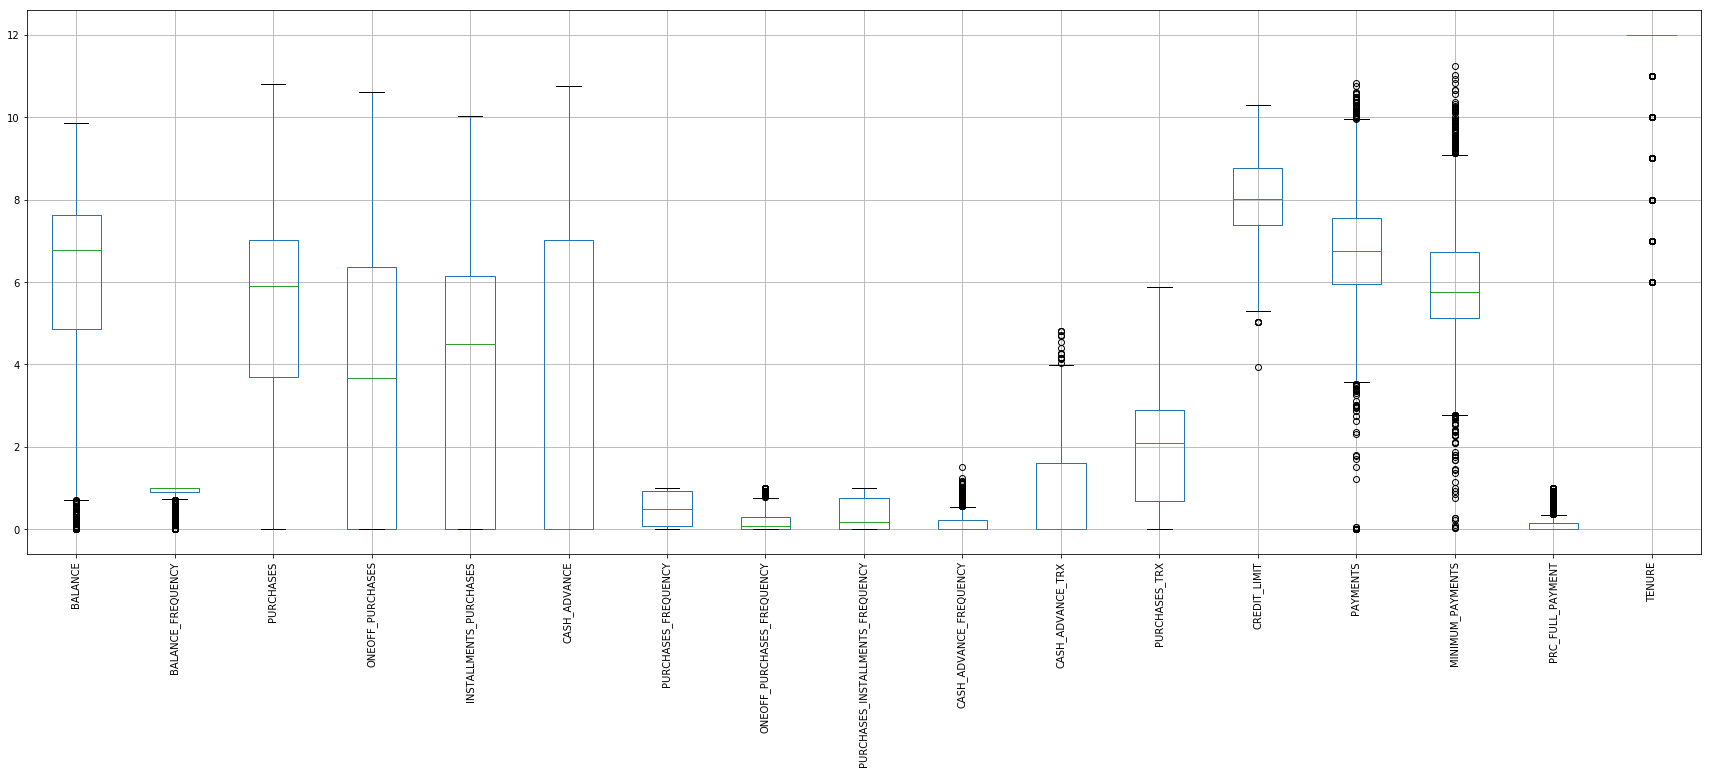

In [34]:
features.boxplot(rot=90, figsize=(30,10)) #check outliers

In [35]:
#IRQ methodology

irq_score = {}

for c in cols:
    q1 = features[c].quantile(0.25)
    q3 = features[c].quantile(0.75)
    score = q3 - q1
    outliers = features[(features[c] < q1 - 1.5 * score) | (features[c] > q3 + 1.5 * score)][c]
    values = features[(features[c] >= q1 - 1.5 * score) | (features[c] <= q3 + 1.5 * score)][c]
    irq_score[c] = {
        "Q1": q1,
        "Q3": q3,
        "IRQ": score,
        "n_outliers": outliers.count(),
        "outliers_avg": outliers.mean(),
        "outliers_stdev": outliers.std(),
        "outliers_median": outliers.median(),
        "values_avg:": values.mean(),
        "values_stdev": values.std(),
        "values_median": values.median(),
    }
    
irq_score = pd.DataFrame.from_dict(irq_score, orient='index')

irq_score

Q1        Q3       IRQ  n_outliers  \
BALANCE                 4.861995  7.628099  2.766104         132   
CASH_ADVANCE            0.000000  7.016449  7.016449           0   
CASH_ADVANCE_TRX        0.000000  1.609438  1.609438          15   
CREDIT_LIMIT            7.378384  8.779711  1.401328           6   
INSTALLMENTS_PURCHASES  0.000000  6.151961  6.151961           0   
MINIMUM_PAYMENTS        5.136526  6.717182  1.580656         144   
ONEOFF_PURCHASES        0.000000  6.360274  6.360274           0   
PAYMENTS                5.951361  7.550732  1.599370         318   
PURCHASES               3.704627  7.013133  3.308506           0   
PURCHASES_TRX           0.693147  2.890372  2.197225           0   

                        outliers_avg  outliers_stdev  outliers_median  \
BALANCE                     0.126403        0.212619         0.000000   
CASH_ADVANCE                     NaN             NaN              NaN   
CASH_ADVANCE_TRX            4.404926        0.295396         4.276666   
CREDIT_LIMIT                4.836371        0.443135         5.017280   
INSTALLMENTS_PURCHASES           NaN             NaN              NaN   
MINIMUM_PAYMENTS            6.626062        3.869982         9.276462   
ONEOFF_PURCHASES                 NaN             NaN              NaN   
PAYMENTS                    1.538181        3.281580         0.000000   
PURCHASES                        NaN             NaN              NaN   
PURCHASES_TRX                    NaN             NaN              NaN   

                        values_avg:  values_stdev  values_median  
BALANCE                    6.161637      2.013303       6.773521  
CASH_ADVANCE               3.319086      3.566298       0.000000  
CASH_ADVANCE_TRX           0.817570      1.009316       0.000000  
CREDIT_LIMIT               8.094835      0.819674       8.006701  
INSTALLMENTS_PURCHASES     3.352403      3.082973       4.499810  
MINIMUM_PAYMENTS           5.922195      1.190493       5.747301  
ONEOFF_PURCHASES           3.204274      3.246365       3.663562  
PAYMENTS                   6.624540      1.591763       6.754489  
PURCHASES                  4.899647      2.916872       5.892417  
PURCHASES_TRX              1.894731      1.373856       2.079442

### # Scale All features
#### put all variables at the same scale, with mean zero and standard deviation equals to one

In [43]:
# Remove CUST_ID (not usefull)
features.drop("CUST_ID", axis=1, inplace=True)

In [47]:
for col in cols:
    features[col] = pp.scale(np.array(features[col]))

features.head()


BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -1.205218           0.818182  -0.113532         -0.987090   
1  0.948918           0.909091  -1.679855         -0.987090   
2  0.824993           1.000000   0.600727          1.062022   
3  0.624653           0.636364   0.827499          1.265778   
4  0.271260           1.000000  -0.708481         -0.114307   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                0.394480     -0.930733             0.166667   
1               -1.087454      1.528788             0.000000   
2               -1.087454     -0.930733             1.000000   
3               -1.087454      0.564372             0.083333   
4               -1.087454     -0.930733             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000         -0.810069      -0.579510     -1.447095   
1                0.250000          0.784603      -1.379210      0.925997   
2                0.000000         -0.810069       0.487865      1.010161   
3                0.083333         -0.123281      -0.874655      1.010161   
4                0.000000         -0.810069      -0.874655     -1.224854   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0 -0.824484         -0.820647          0.000000      12  
1  1.065033          0.887361          0.222222      12  
2 -0.119300          0.437490          0.000000      12  
3 -4.161996               NaN          0.000000      12  
4 -0.064979         -0.350894          0.000000      12

In [51]:
# Fill NAs by mean
features = features.fillna(features.mean())
features.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

### Clustinr - K-means

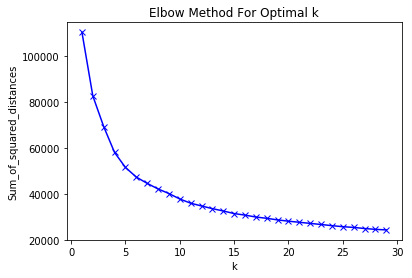

In [52]:
X = np.array(features)
Sum_of_squared_distances = []
K = range(1, 30)

for k in K:
    km = KMeans(n_clusters=k, random_state=0)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

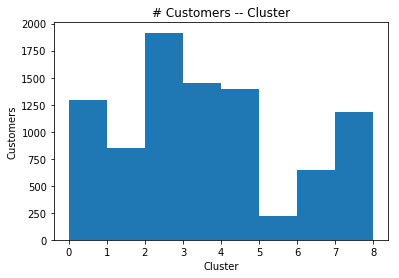

In [54]:
# Choose number of clusters

n_clusters = 8

clustering = KMeans(n_clusters=n_clusters,
                    random_state=0
                   )

cluster_labels = clustering.fit_predict(X)

# plot cluster sizes

plt.hist(cluster_labels, bins=range(n_clusters+1))
plt.title('# Customers -- Cluster')
plt.xlabel('Cluster')
plt.ylabel('Customers')
plt.show()

# Assing cluster number to features and original dataframe
features['cluster_index'] = cluster_labels
data['cluster_index'] = cluster_labels

C:\Users\anc7\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\anc7\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


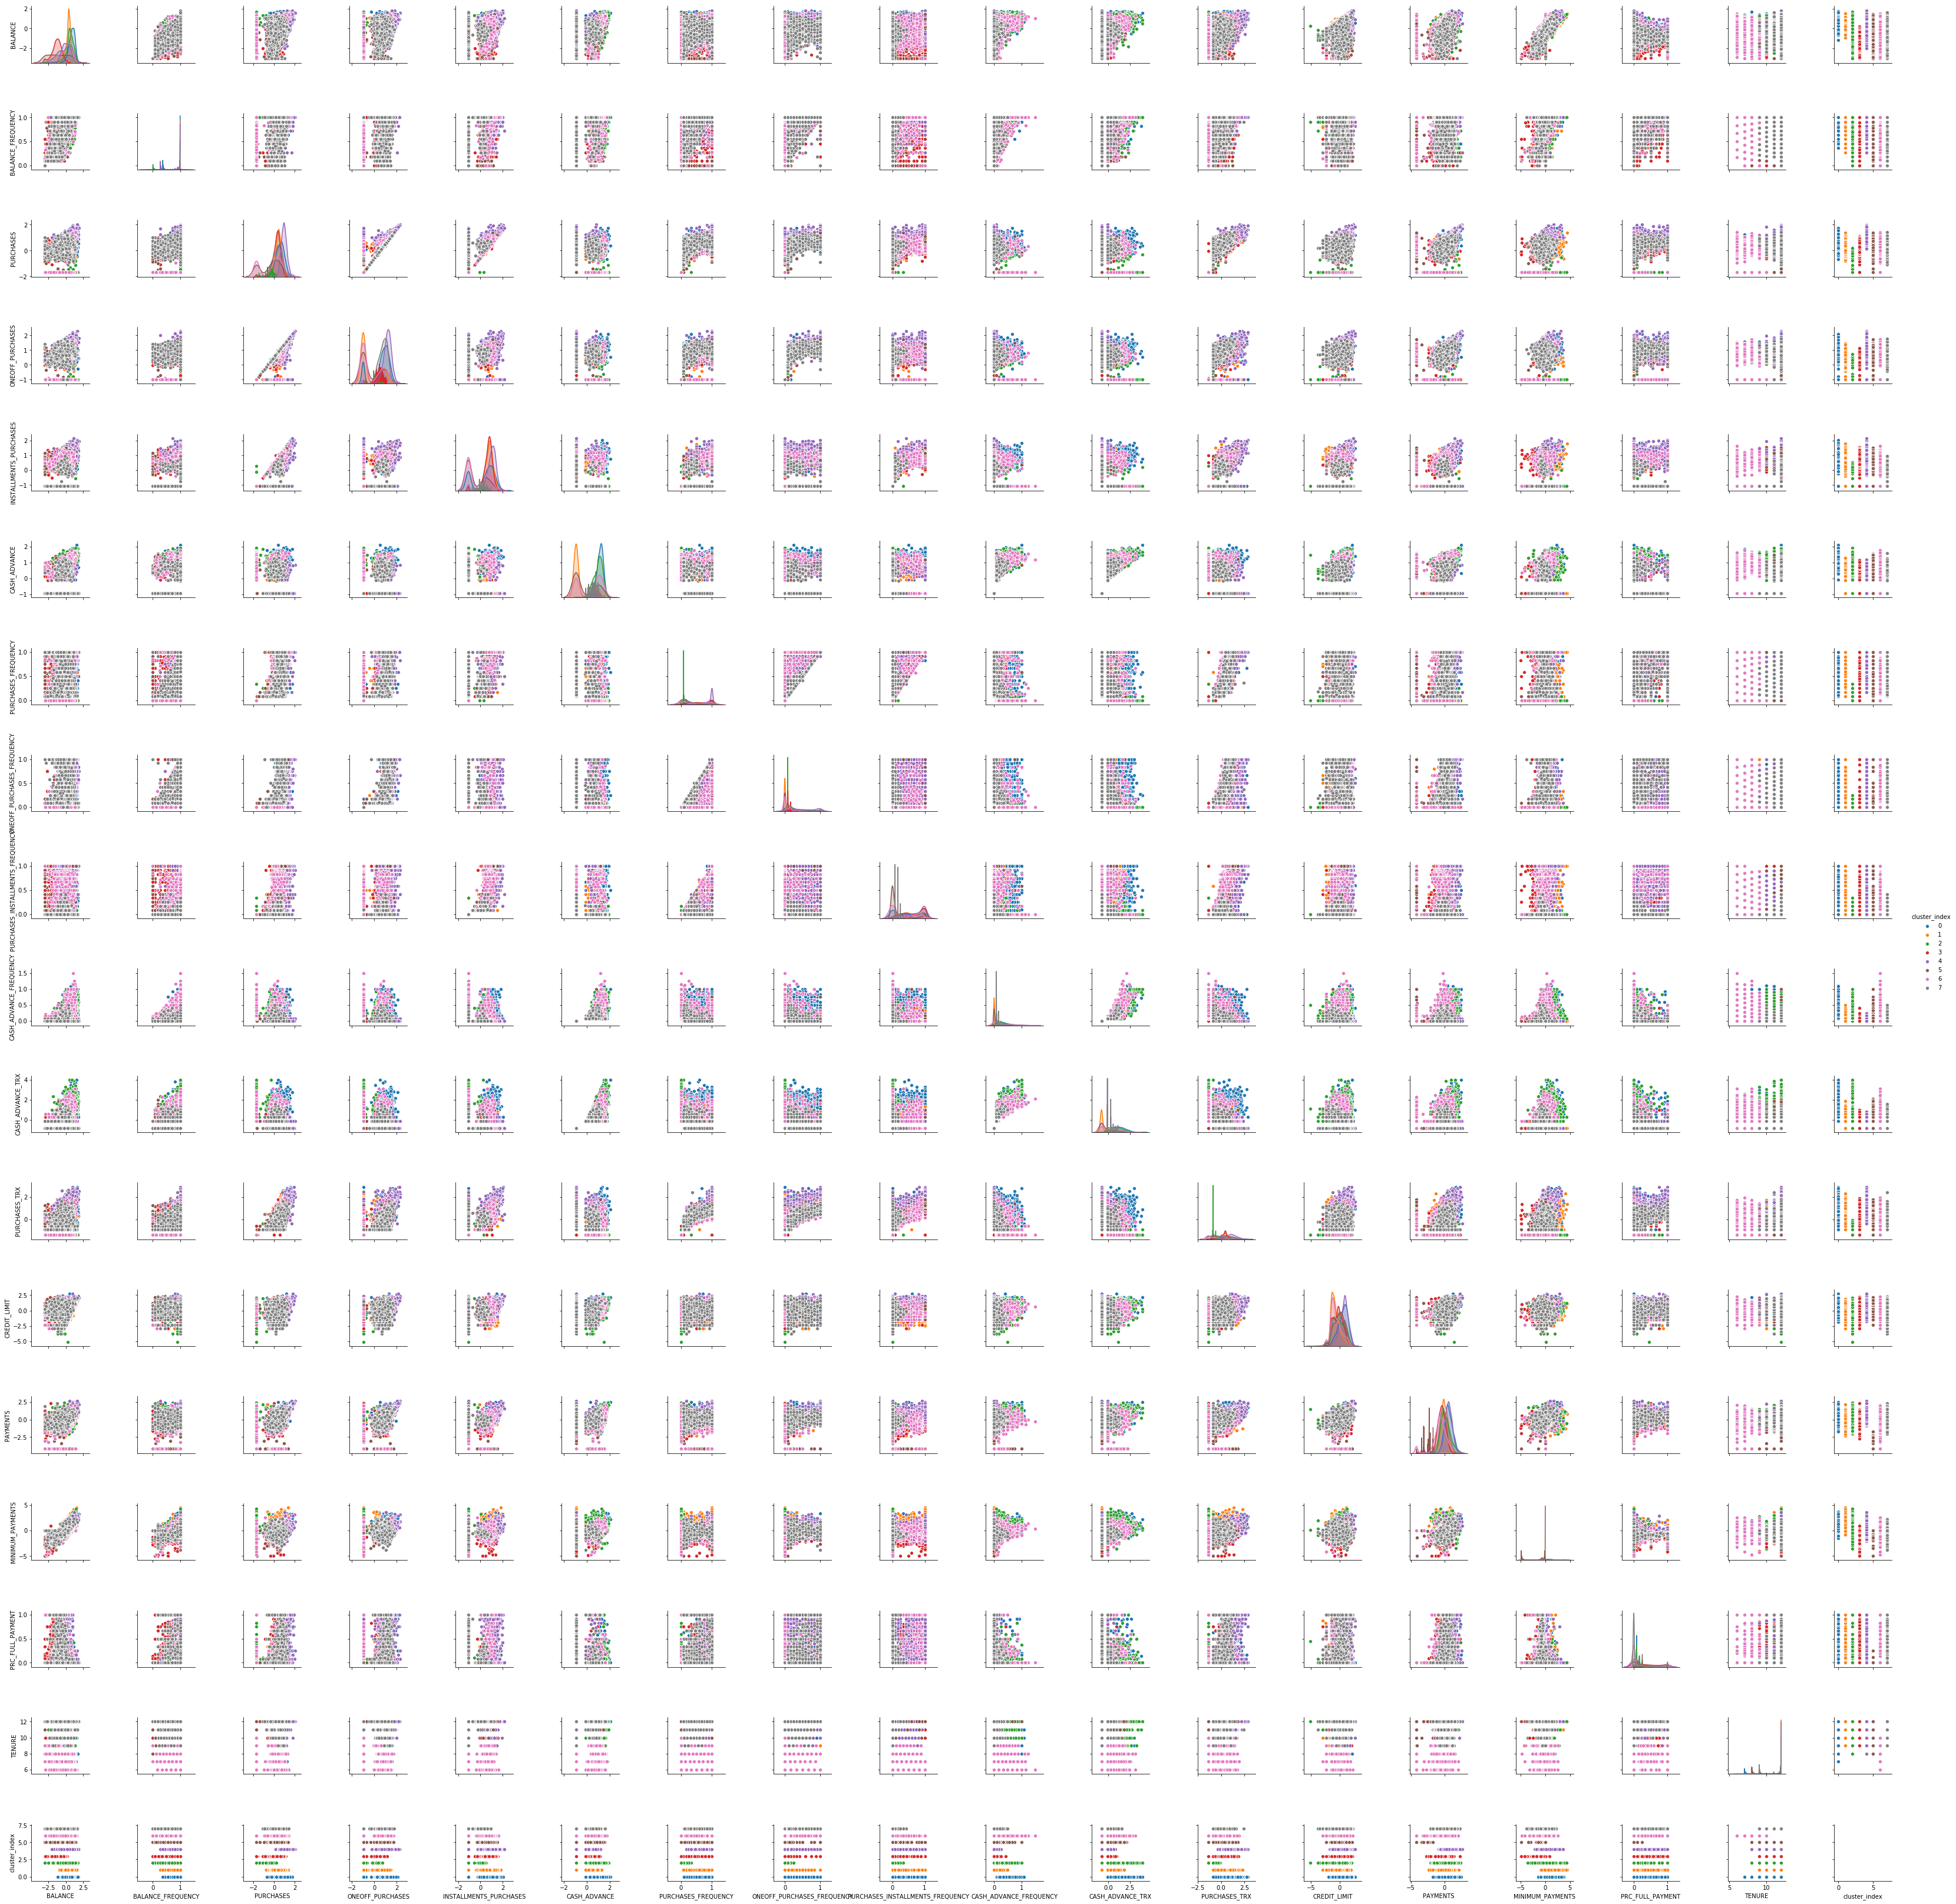

In [55]:
# Dispersion between clusterized data
# Pairplot - dispersion between variables
sns.pairplot(features, hue='cluster_index')